In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import random, string
from datetime import datetime, timedelta,date

In [2]:
data= pd.read_csv('vehicle_data.csv')

In [3]:
data

,Unnamed: 0,id,range,Battery Level (%),Latitude (°),Longitude (°),speed,Maintenance Cost ($),Charging Cost ($),Pin Code,...,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats,km
0,0,4,199.200,43,24.133183,74.192878,84,190,16,930882,...,82.0,4261,1809,1568,2771,2300,447,385,5,84267.0
1,1,4,199.200,43,24.133183,74.192878,84,190,16,930882,...,82.0,4261,1809,1568,2771,2300,447,385,5,77279.0
2,2,4,48.216,18,14.874813,94.513065,90,192,11,593157,...,82.0,4261,1809,1568,2771,2300,447,385,5,30793.0
3,3,4,48.216,18,14.874813,94.513065,90,192,11,593157,...,82.0,4261,1809,1568,2771,2300,447,385,5,26956.0
4,4,4,216.804,46,23.473234,89.530714,59,183,8,292617,...,82.0,4261,1809,1568,2771,2300,447,385,5,88146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,2,44.700,17,16.483978,75.933133,91,287,37,672773,...,82.0,4694,1849,1443,2875,2232,388,561,5,29423.0
1996,1996,2,235.470,72,10.905087,79.750679,86,188,10,458530,...,82.0,4694,1849,1443,2875,2232,388,561,5,139310.0
1997,1997,2,235.470,72,10.905087,79.750679,86,188,10,458530,...,82.0,4694,1849,1443,2875,2232,388,561,5,140843.0
1998,1998,2,36.660,18,30.201833,87.204171,48,244,35,787427,...,82.0,4694,1849,1443,2875,2232,388,561,5,25163.0


In [4]:
data1 = data.drop(['km','Unnamed: 0','Maintenance Cost ($)','Charging Cost ($)','id','status','Date','dvr','mgr','Seats','Latitude (°)','Longitude (°)','Pin Code','speed','Working Condition', 'Charging Status','Energy Consumed (kWh)','Fast Charge Speed (kW)'],axis=1)

In [5]:
list(data1)

['range',
 'Battery Level (%)',
 'Make',
 'Acceleration 0 - 100 km/h',
 'Top Speed',
 'ER',
 'Total Power',
 'Total Torque',
 'Drive',
 'BC',
 'Length',
 'Width',
 'Height',
 'Wheelbase',
 'Gross Vehicle Weight (GVWR)',
 'Max. Payload',
 'Cargo Volume']

In [6]:
len(list(data1))

17

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   range                        2000 non-null   float64
 1   Battery Level (%)            2000 non-null   int64  
 2   Make                         2000 non-null   object 
 3   Acceleration 0 - 100 km/h    2000 non-null   float64
 4   Top Speed                    2000 non-null   int64  
 5   ER                           2000 non-null   int64  
 6   Total Power                  2000 non-null   int64  
 7   Total Torque                 2000 non-null   int64  
 8   Drive                        2000 non-null   object 
 9   BC                           2000 non-null   float64
 10  Length                       2000 non-null   int64  
 11  Width                        2000 non-null   int64  
 12  Height                       2000 non-null   int64  
 13  Wheelbase         

In [8]:
data2 = pd.get_dummies(data1,dtype=int)

In [9]:
data2.shape

(2000, 23)

In [10]:
data1.shape

(2000, 17)

In [11]:
data2.head(5)

,range,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
0,199.200,43,7.9,160,450,150,310,82.0,4261,1809,...,447,385,0,0,0,0,1,0,0,1
1,199.200,43,7.9,160,450,150,310,82.0,4261,1809,...,447,385,0,0,0,0,1,0,0,1
2,48.216,18,7.9,160,450,150,310,82.0,4261,1809,...,447,385,0,0,0,0,1,0,0,1
3,48.216,18,7.9,160,450,150,310,82.0,4261,1809,...,447,385,0,0,0,0,1,0,0,1
4,216.804,46,7.9,160,450,150,310,82.0,4261,1809,...,447,385,0,0,0,0,1,0,0,1


In [12]:
y=data2['range']

In [13]:
x = data2.drop('range',axis=1)

In [14]:
x

,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,Height,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
0,43,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
1,43,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
2,18,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
3,18,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
4,46,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
1996,72,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
1997,72,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
1998,18,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0


In [15]:
y

0       199.200
1       199.200
2        48.216
3        48.216
4       216.804
         ...   
1995     44.700
1996    235.470
1997    235.470
1998     36.660
1999     36.660
Name: range, Length: 2000, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [17]:
X_train.head(5)

,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,Height,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
968,90,4.4,233,485,366,493,82.0,4694,1849,1443,...,388,561,0,0,1,0,0,1,0,0
240,46,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
819,19,4.4,233,485,366,493,82.0,4694,1849,1443,...,388,561,0,0,1,0,0,1,0,0
692,92,5.7,190,470,250,430,83.9,4783,1852,1448,...,555,470,1,0,0,0,0,0,0,1
420,24,5.7,190,470,250,430,83.9,4783,1852,1448,...,555,470,1,0,0,0,0,0,0,1


In [18]:
X_test.head(5)

,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,Height,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
1860,94,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
353,90,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
1333,37,7.4,160,425,170,330,78.0,4607,1800,1479,...,496,405,0,1,0,0,0,0,1,0
905,41,4.4,233,485,366,493,82.0,4694,1849,1443,...,388,561,0,0,1,0,0,1,0,0
1289,72,7.4,160,425,170,330,78.0,4607,1800,1479,...,496,405,0,1,0,0,0,0,1,0


In [19]:
### Linear Prediction Model

In [20]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = Model.predict(X_test)

In [22]:
y_pred

array([321.09375, 309.0625 , 137.53125, 155.25   , 248.03125,  83.90625,
       221.5    , 160.09375,  72.1875 , 273.28125, 103.8125 , 219.65625,
       335.125  , 287.1875 , 312.1875 , 135.4375 ,  88.3125 , 151.1875 ,
       141.09375, 264.21875, 302.9375 , 153.71875, 238.96875, 208.875  ,
       141.09375, 324.8125 , 164.625  , 161.5    , 341.5    , 195.3125 ,
       293.4375 , 145.75   , 135.6875 , 174.125  , 335.125  , 334.5625 ,
       257.53125, 115.40625, 268.875  , 163.8125 , 299.5625 , 327.34375,
       315.3125 , 287.1875 , 121.78125, 332.     , 261.9375 , 190.     ,
       277.4375 , 257.53125, 276.40625, 264.8125 , 156.53125, 103.8125 ,
       164.625  , 175.84375, 301.65625, 204.21875, 181.78125, 163.8125 ,
       203.90625, 179.8125 , 182.21875,  79.5    , 245.34375, 160.09375,
       322.5    , 327.03125, 207.9375 , 207.03125, 289.03125, 290.0625 ,
       219.65625, 243.625  , 306.0625 , 309.0625 , 207.46875, 231.     ,
       236.4375 , 131.59375, 189.0625 , 221.5    , 

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8680346188838277

In [24]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_value = mape(y_test,y_pred)
mape_value

0.17590016351275076

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

853.6879920645313

In [26]:
Results= pd.DataFrame(columns=['Actual', 'Predicted']) 
Results['Actual']=y_test
Results ['Predicted']=y_pred 
#Results[km]x test['km'] 
Results=Results.reset_index() 
Results['id']=Results.index 
Results.head(15)

,index,Actual,Predicted,id
0,1860,325.4700,321.09375,0
1,353,304.2450,309.06250,1
2,1333,148.8240,137.53125,2
3,905,181.7280,155.25000,3
4,1289,241.7175,248.03125,4
5,1273,62.7480,83.90625,5
6,938,190.2900,221.50000,6
7,1731,189.2160,160.09375,7
8,65,20.1240,72.18750,8
9,1323,271.4700,273.28125,9


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

[]

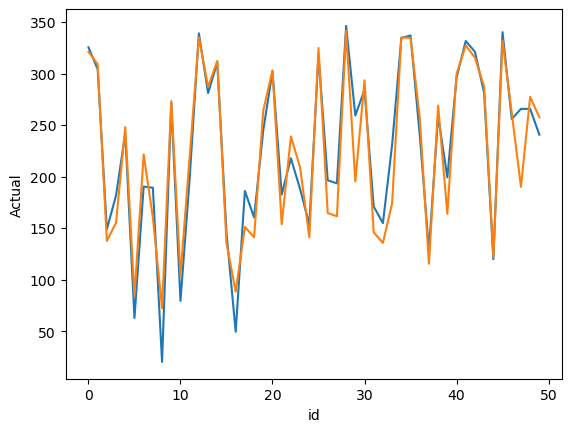

In [28]:
sns.lineplot(x='id',y='Actual',data = Results.head(50))
sns.lineplot(x='id',y='Predicted',data = Results.head(50))

plt.plot()

In [29]:
import pickle
pickle.dump(Model,open('test','wb'))

In [30]:
model = pickle.load(open('test','rb'))

In [31]:
r1 = [[15,5.7,190,470,250,430,83.9,4783,1852,1448,2856,2605,555,470,1,0,0,0,0,0,0,1]]
hh = model.predict(r1)
hh[0]

C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.375

In [32]:
Tesla1 = [20,4.4,233,485,366,493,82,4694,1849,1443,2875,2232,388,561,0,0,1,0,0,1,0,0]
Tesla1_1 = [50,4.4,233,485,366,493,82,4694,1849,1443,2875,2232,388,561,0,0,1,0,0,1,0,0]
Tesla2 = [35,3.3,261,460,377,660,82,4694,1849,1443,2875,2232,388,561,0,0,0,1,0,1,0,0]
BMW = [45,5.7,190,470,250,430,83.9,4783,1852,1448,2856,2605,555,470,1,0,0,0,0,0,0,1]
Volkswagen = [60,7.9,160,450,150,310,82,4261,1809,1568,2771,2300,447,385,0,0,0,0,1,0,0,1]
Polestar = [70,7.4,160,425,170,330,78,4607,1800,1479,2735,2490,496,405,0,1,0,0,0,0,1,0]

In [33]:
# Tesla1 = [20,4.4,233,485,366,493,82,4694,1849,1443,2875,2232,388,561,350000,0,0,1,0,0,1,0,0]
# Tesla2 = [35,3.3,261,460,377,660,82,4694,1849,1443,2875,2232,388,561,100000,0,0,0,1,0,1,0,0]
# BMW = [45,5.7,190,470,250,430,83.9,4783,1852,1448,2856,2605,555,470,600000,1,0,0,0,0,0,0,1]
# Volkswagen = [60,7.9,160,450,150,310,82,4261,1809,1568,2771,2300,447,385,25000,0,0,0,0,1,0,0,1]
# Polestar = [70,7.4,160,425,170,330,78,4607,1800,1479,2735,2490,496,405,150000,0,1,0,0,0,0,1,0]

In [34]:
battery_levels = [15,20,25,35,45,50,60,75,85]
vehicles = [Tesla1,Tesla2,BMW,Volkswagen,Polestar]
b=0
for vehicle in vehicles:
    if b==0:
        print("Tesla1")
    elif b==1:
        print("Tesla2")
    elif b==2:
        print("BMW")
    elif b==3:
        print("Volkswagan")
    else:
        print("Polestar")
    for bvalue in battery_levels:
        vehicle[0]=bvalue
        
        print("BL:" + str(bvalue) + " range: " + str(model.predict([vehicle])[0]))
    b+=1

Tesla1
BL:15 range: 72.9375
BL:20 range: 88.6875
BL:25 range: 104.5625
BL:35 range: 136.1875
BL:45 range: 167.6875
BL:50 range: 183.4375
BL:60 range: 215.0625
BL:75 range: 262.4375
BL:85 range: 293.9375
Tesla2
BL:15 range: 71.4375
BL:20 range: 87.1875
BL:25 range: 102.9375
BL:35 range: 134.5625
BL:45 range: 166.1875
BL:50 range: 181.9375
BL:60 range: 213.4375
BL:75 range: 260.8125
BL:85 range: 292.4375
BMW
BL:15 range: 69.375
BL:20 range: 85.125
BL:25 range: 100.875
BL:35 range: 132.5
BL:45 range: 164.0
BL:50 range: 179.875
BL:60 range: 211.375
BL:75 range: 258.75
BL:85 range: 290.375
Volkswagan
BL:15 range: 72.0
BL:20 range: 87.75
BL:25 range: 103.625
BL:35 range: 135.125
BL:45 range: 166.75
BL:50 range: 182.5
BL:60 range: 214.125
BL:75 range: 261.375
BL:85 range: 293.0
Polestar
BL:15 range: 68.0
BL:20 range: 83.75
BL:25 range: 99.625
BL:35 range: 131.25
BL:45 range: 162.75
BL:50 range: 178.5
BL:60 range: 210.125
BL:75 range: 257.5
BL:85 range: 289.0


C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Anshika Awasthi\anaconda3\Lib\s

In [35]:
from sklearn.linear_model import Ridge 
# training model with 0.5 alpha value 
ridge_model = Ridge(alpha = 0.5, tol = 0.001,solver ='auto', random_state = 42) 
ridge_model.fit(X_train, y_train) 

# predicting the y_test 
ridge_y_pred = ridge_model.predict(X_test) 
  
# finding score for our model 
score = ridge_model.score(X_test, ridge_y_pred ) 
# print("\n\nRidge Model score : ", score) 

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,ridge_y_pred)

0.8680152607012706

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,ridge_y_pred)
mse

853.8132207256954

In [38]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_value = mape(y_test,ridge_y_pred)
mape_value

0.17590422928938707

In [39]:
Ridge_Results= pd.DataFrame(columns=['Actual', 'Predicted']) 
Ridge_Results['Actual']=y_test
Ridge_Results['Predicted']=ridge_y_pred
#Results[km]x test['km'] 
Ridge_Results=Ridge_Results.reset_index() 
Ridge_Results['id']=Ridge_Results.index 
Ridge_Results.head(15)

,index,Actual,Predicted,id
0,1860,325.4700,321.006056,0
1,353,304.2450,308.970048,1
2,1333,148.8240,137.599199,2
3,905,181.7280,155.169191,3
4,1289,241.7175,248.092669,4
5,1273,62.7480,83.930942,5
6,938,190.2900,221.465273,6
7,1731,189.2160,160.001285,7
8,65,20.1240,72.198327,8
9,1323,271.4700,273.348319,9


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

[]

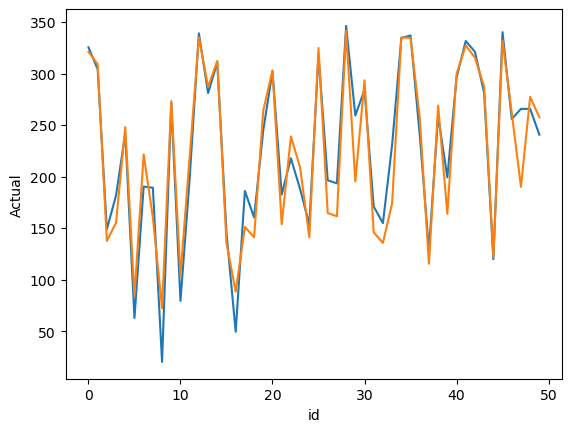

In [41]:
sns.lineplot(x='id',y='Actual',data = Results.head(50))
sns.lineplot(x='id',y='Predicted',data = Results.head(50))

plt.plot()

In [42]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.7)

# Fit the model to the training data
elastic_net.fit(X_train, y_train)


# Make predictions on the test data
elastic_net_y_pred = elastic_net.predict(X_test)


# Print the coefficients of the trained model
# print('Elastic Net coefficients:')
# print(elastic_net.coef_)

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,elastic_net_y_pred)

0.8680198586906294

In [44]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,elastic_net_y_pred)
mse

853.7834761951974

In [45]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_value = mape(y_test,elastic_net_y_pred)
mape_value

0.17599837448087585

In [46]:
Elastic_Net_Results= pd.DataFrame(columns=['Actual', 'Predicted']) 
Elastic_Net_Results['Actual']=y_test
Elastic_Net_Results['Predicted']=elastic_net_y_pred
#Results[km]x test['km'] 
Elastic_Net_Results=Elastic_Net_Results.reset_index() 
Elastic_Net_Results['id']=Elastic_Net_Results.index 
Elastic_Net_Results.head(15)

,index,Actual,Predicted,id
0,1860,325.4700,320.975014,0
1,353,304.2450,308.911337,1
2,1333,148.8240,137.645085,2
3,905,181.7280,155.172397,3
4,1289,241.7175,248.089804,4
5,1273,62.7480,84.000507,5
6,938,190.2900,221.439229,6
7,1731,189.2160,160.041280,7
8,65,20.1240,72.244081,8
9,1323,271.4700,273.334311,9


C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anshika Awasthi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

[]

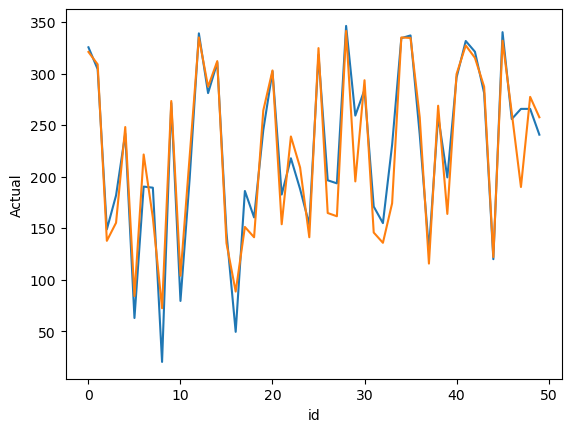

In [47]:
sns.lineplot(x='id',y='Actual',data = Elastic_Net_Results.head(50))
sns.lineplot(x='id',y='Predicted',data = Elastic_Net_Results.head(50))

plt.plot()

In [48]:
Results + Ridge_Results + Elastic_Net_Results

,index,Actual,Predicted,id
0,5580,976.4100,963.074819,0
1,1059,912.7350,926.943885,3
2,3999,446.4720,412.775534,6
3,2715,545.1840,465.591588,9
4,3867,725.1525,744.213723,12
...,...,...,...,...
395,2895,580.3200,484.466628,1185
396,3852,543.5640,450.650612,1188
397,5217,904.9500,906.199701,1191
398,783,316.0800,330.255145,1194


In [49]:
final_results=pd.DataFrame()
final_results['Actual'] = y_test
final_results['Linear_pred'] = y_pred
final_results['Ridge_pred'] = ridge_y_pred
final_results['ElasticNet_Pred'] = elastic_net_y_pred
final_results=final_results.reset_index() 
final_results['id']=final_results.index 
final_results.head(20)

,index,Actual,Linear_pred,Ridge_pred,ElasticNet_Pred,id
0,1860,325.4700,321.09375,321.006056,320.975014,0
1,353,304.2450,309.06250,308.970048,308.911337,1
2,1333,148.8240,137.53125,137.599199,137.645085,2
3,905,181.7280,155.25000,155.169191,155.172397,3
4,1289,241.7175,248.03125,248.092669,248.089804,4
5,1273,62.7480,83.90625,83.930942,84.000507,5
6,938,190.2900,221.50000,221.465273,221.439229,6
7,1731,189.2160,160.09375,160.001285,160.041280,7
8,65,20.1240,72.18750,72.198327,72.244081,8
9,1323,271.4700,273.28125,273.348319,273.334311,9
